# Clothes Classification

## Import packages

In [19]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from random import randint

## Explore data
The following dataset was made by Zalando Data Science team, and it is fully described [here](https://arxiv.org/pdf/1708.07747.pdf).

It contains preprocessed clothes photos, in format of 28 x 28 matrices in grayscale (1 to 255).

There are 10 labels in dataset:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [55]:
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Training set checkout

In [8]:
tr_set = pd.read_csv("data/fashion-mnist_train.csv")

In [9]:
tr_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

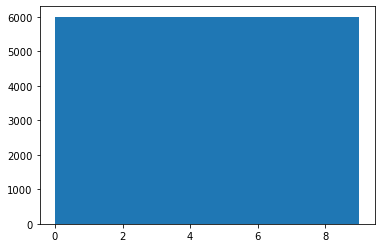

In [150]:
plt.hist(tr_set['label'])

So we can see that the training data is equally composed.

Let's try to look at random sample:

In [77]:
def show_sample(sample_id, dataset):
    sample = dataset.iloc[[sample_id]]
    label = int(sample['label'])
    img = np.array(sample, dtype='float')
    img = img[:, 1:]
    img = img.reshape((28,28))

    plt.imshow(img, cmap='gray')
    plt.title("Label {0}: {1}".format(label, label_names[label]))
    plt.show()

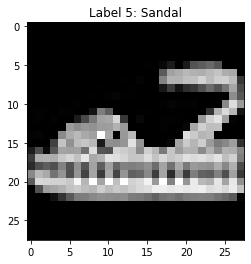

In [148]:
show_sample(randint(0,60000), tr_set)

### Test set checkout
We can also check composition of test set:

(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

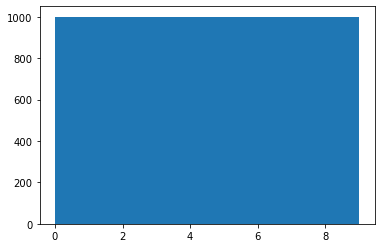

In [79]:
tst_set = pd.read_csv('data/fashion-mnist_test.csv')
plt.hist(tst_set['label'])

And it is also well composed like training set - each label has 1000 samples.

### Labels differences
We will check full dataset - both train and test data. Also, I will add `label_name` column to make comparision more clearly

In [134]:
full_set = pd.concat([tr_set, tst_set])
full_set['label_name'] = pd.DataFrame([label_names[el] for el in list(full_set.iloc[:, 0].astype(int))])

Now we can try to spot differences between each clothes types. For example, sandals have much less white pixels than ankle boots. Let's see comparision of classes.

In [138]:
full_set['pixels_sum'] = full_set.iloc[:, 1:-1].sum(axis=1)
labels_pixels_sum = full_set.groupby(by=['label_name'])['pixels_sum'].mean()

In [142]:
labels_pixels_sum

label_name
Ankle boot     59999.078596
Bag            68809.013192
Coat           74199.152601
Dress          52686.620793
Pullover       72672.227881
Sandal         31586.809789
Shirt          65265.959271
Sneaker        37018.868552
T-shirt/top    63927.906977
Trouser        46298.467298
Name: pixels_sum, dtype: float64

<AxesSubplot:xlabel='label_name'>

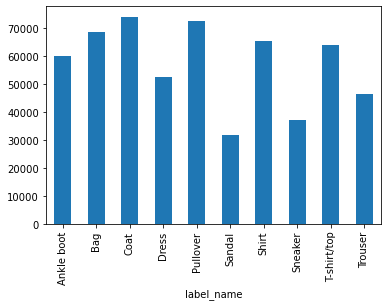

In [144]:
labels_pixels_sum.plot.bar()

As we can see above, the labels have different mean of `pixels_sum`. Coat by average has the most white pixels, whereas sandal has the least.